## Visualización

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("../datos/df_clean.csv", index_col=0)

In [34]:
df_cat_value = df.groupby(["economy_category", "economy_subcategory"])[["updated_estimated_value", "value_launched", "realized_value"]].sum()

Tenemos pares de índices, lo cual podremos usar para agrupar las categorías con las subcategorías para los plots.

In [36]:
df_cat_value.index

MultiIndex([( 'Receitas Correntes', 'extra-orçamentárias'),
            ( 'Receitas Correntes', 'intra-orçamentárias'),
            ('Receitas de Capital', 'extra-orçamentárias'),
            ('Receitas de Capital', 'intra-orçamentárias'),
            (     'Sem informação',      'sem informação')],
           names=['economy_category', 'economy_subcategory'])

Usando iloc podemos extraer los valores de cada uno de los pares de índices.

In [52]:
df_cat_value.iloc[0]

updated_estimated_value    1.314568e+13
value_launched             8.110168e+12
realized_value             1.341424e+13
Name: (Receitas Correntes, extra-orçamentárias), dtype: float64

Y podemos plotearlo de dos maneras: La primera sería por categoría, y dentro los distintos tipos de valores.

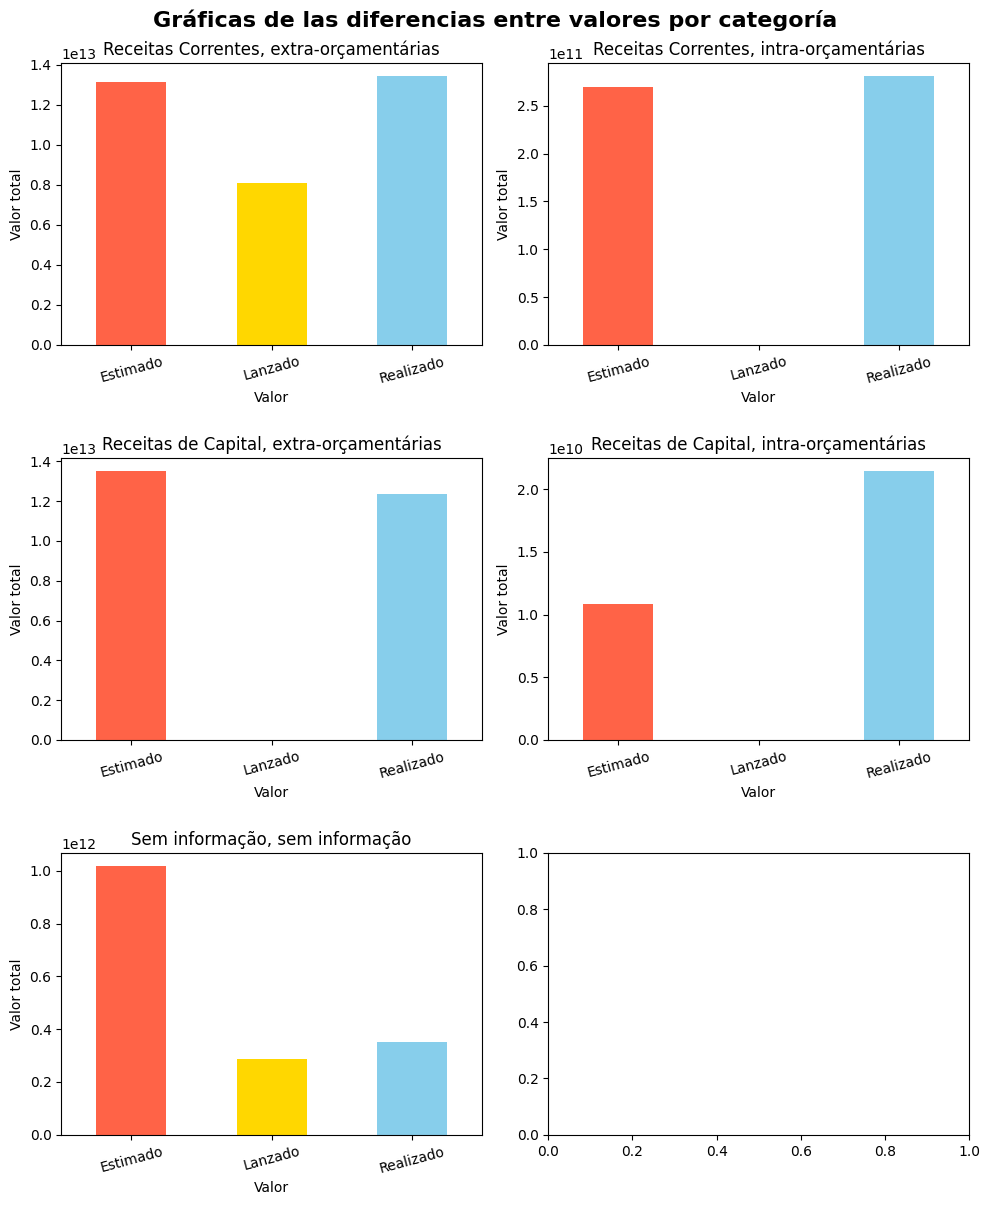

In [100]:
num_plots = len(df_cat_value)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
axes = axes.flat

for i in range(num_plots):
    category_subcat = df_cat_value.index[i]
    values = df_cat_value.iloc[i]
    labels = ["Estimado", "Lanzado", "Realizado"]
    values[["updated_estimated_value", "value_launched", "ealized_value"]].plot(kind="bar", ax=axes[i], 
            color = ["tomato", "gold", "skyblue"])
    axes[i].set_title(f"{category_subcat[0]} {category_subcat[1]}")
    axes[i].set_ylabel("Valor total")
    axes[i].set_xlabel("Valor")
    axes[i].tick_params(axis = "x", labelrotation = 15)
    axes[i].set_xticklabels(labels)
fig.tight_layout()
fig.suptitle("Gráficas de las diferencias entre valores por categoría", y = 1, fontsize = 16, fontweight = "bold")
plt.show()


Este tipo de gráfica nos da información sobre las diferencias entre los valores estimado, lanzado y finalmente realizado en cada una de los categoría-subcategoría económicas.

Otra opción es hacerlo al contrario, clasificadas por tipo de valor y dentro por categorías-subcategorías.

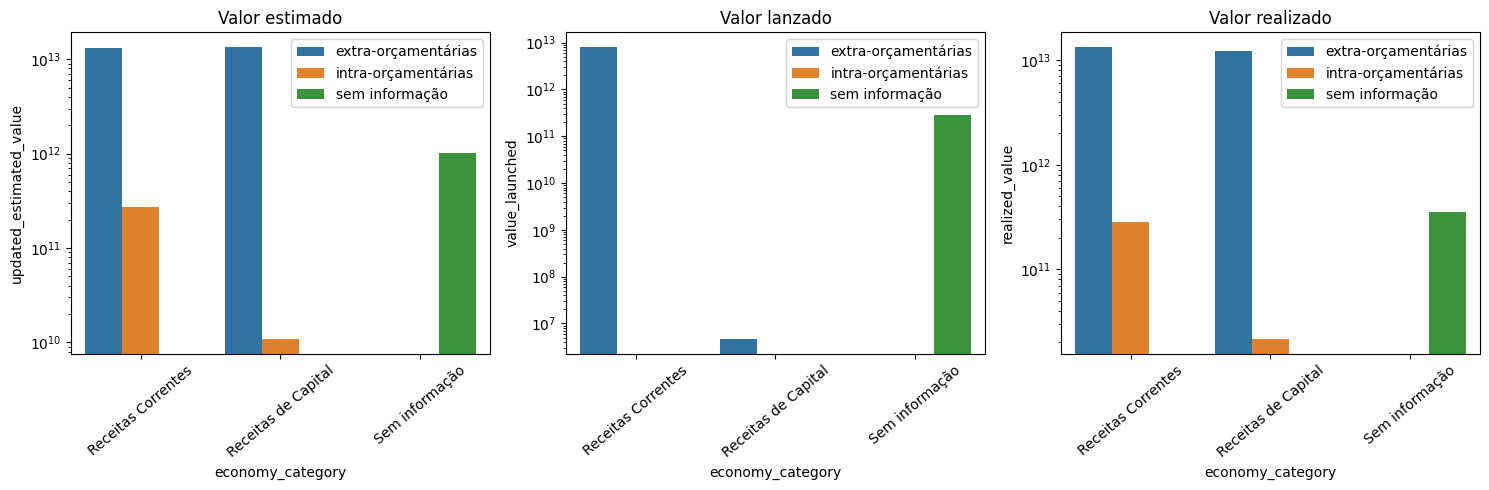

In [6]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
axes[0].set_title("Valor estimado")
sns.barplot(data = df_cat_value, x = "economy_category", y = "updated_estimated_value", 
            hue = "economy_subcategory", ax = axes[0])
axes[1].set_title("Valor lanzado")
sns.barplot(data = df_cat_value, x = "economy_category", y = "value_launched", 
            hue = "economy_subcategory", ax = axes[1])
axes[2].set_title("Valor realizado")
sns.barplot(data = df_cat_value, x = "economy_category", y = "realized_value", 
            hue = "economy_subcategory", ax = axes[2])
plt.legend()
for i in range(3):
    axes[i].tick_params(axis = "x", labelrotation = 40)
    axes[i].set_yscale("log")
    axes[i].legend()
plt.tight_layout()

En nuestro caso el primer tipo de gráfica ofrece una mejor visualización, sobretodo cuando nos centramos en comprobar qué categoría tiene las mejores estimaciones y cuál la peor. Se observa que las de ingresos corrientes tienen una mayor consistencia entre lo obtenido y lo estimado.

Ahora vamos a graficar la evolución temporal. En este caso solo agruparemos por categorías, es decir, las subcategorías ya están contenidas en estas. Además podremos realizar de nuevo 2 tipos de gráficas, aquellas clasificadas por categorías y otra donde se comparará directamente ambos valores a lo largo de los años.

In [106]:
df.columns

Index(['superior_body_code', 'name_superior_body', 'organ_code', 'organ_name',
       'management_unit_code', 'name_management_unit', 'economy_category',
       'source_revenue', 'recipe_species', 'detailing',
       'updated_estimated_value', 'value_launched', 'realized_value',
       'percentage_realized', 'release_date', 'financial_year',
       'economy_subcategory'],
      dtype='object')

In [110]:
df_cat_year = df.groupby(["economy_category", "financial_year"])[["updated_estimated_value","value_launched","realized_value"]].sum().reset_index()

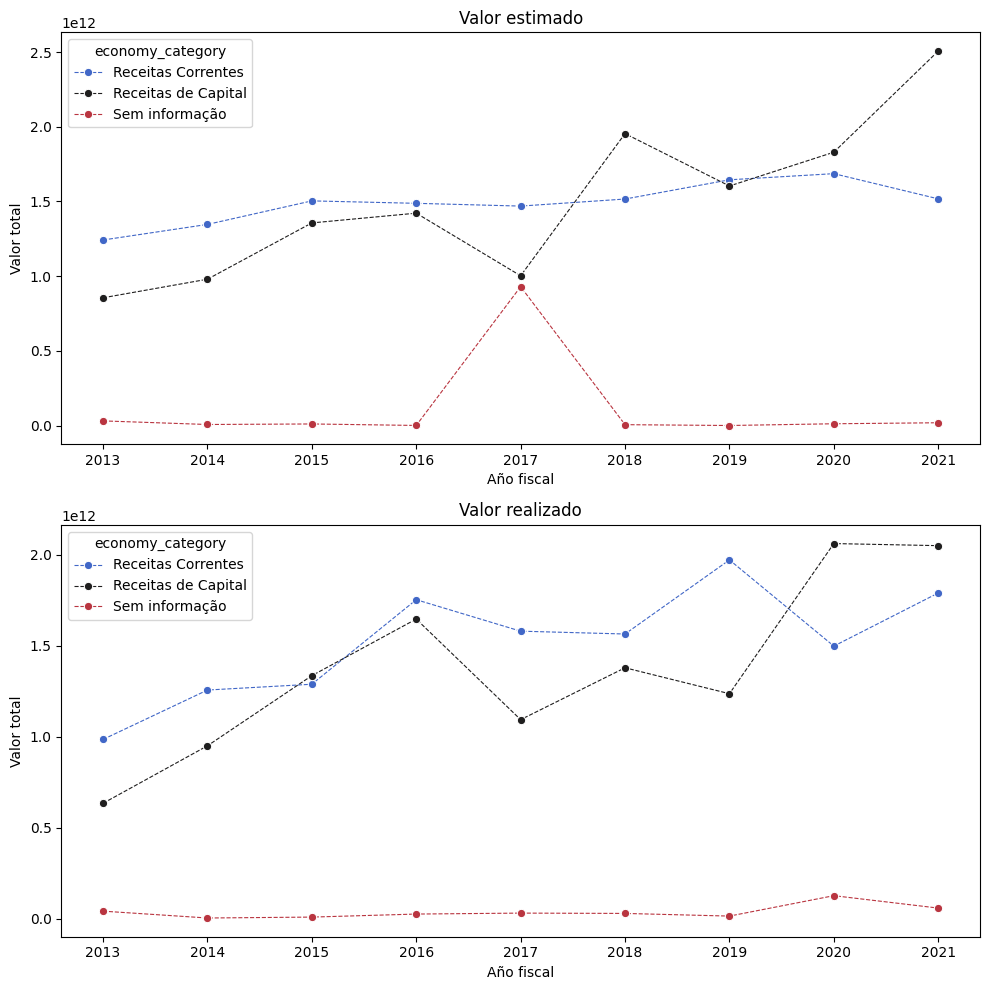

In [136]:
fig, axes = plt.subplots(2,1, figsize = (10,10))

sns.lineplot(data = df_cat_year, x = "financial_year", y = "updated_estimated_value", hue = "economy_category", ax = axes[0],
             palette = "icefire", lw = 0.8, ls = "--", marker = "o")

sns.lineplot(data = df_cat_year, x = "financial_year", y = "realized_value", hue = "economy_category", ax = axes[1],
             palette = "icefire", lw = 0.8, ls = "--", marker = "o")

axes[0].set_title("Valor estimado")
axes[1].set_title("Valor realizado")

for i in range(2):
    axes[i].set_ylabel("Valor total")
    axes[i].set_xlabel("Año fiscal")
fig.tight_layout()
plt.show()

En esta podemos observar con claridad el valor estimado y valor realizado de cada una de las categorías. Sin embargo para poder conseguir información sobre la precisión de las estimaciones tenemos que realizar el segundo tipo de gráfica. 

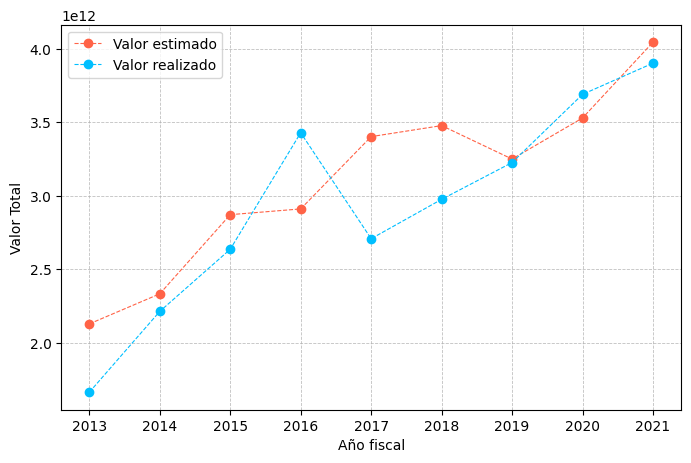

In [164]:
df_year_value = df.groupby("financial_year")[["updated_estimated_value","realized_value"]].sum().reset_index()
x = df_year_value["financial_year"].values
y1 = df_year_value["updated_estimated_value"].values
y2 = df_year_value["realized_value"].values
plt.figure(figsize=(8,5))
plt.grid(lw = 0.6, ls = "--", alpha = 0.8)
plt.plot(x,y1, lw = 0.8, ls = "--", marker = "o", label = "Valor estimado", color = "tomato")
plt.plot(x,y2, lw = 0.8, ls = "--", marker = "o", label = "Valor realizado", color = "deepskyblue")
plt.legend()
plt.xlabel("Año fiscal")
plt.ylabel("Valor Total")
plt.show()


Aquí ya podemos observar cómo el valor estimado suele ser superior al que acaba recaudándose al final, exceptuando algunos años como 2016 principalmente. Tras una breve investigación, uno aprende sobre las protestas en brasil de 2015 y 2016, y la entrada en una recesión durante estos años, lo cual podría explicar el aumento de ingresos gubernamentales como una forma de escudarse ante la crisis, además de que en este año fue cuando se empezó a observar una salida de la recesión.

Ahora procedemos a realizar diagramas de cajas para evaluar la dispersión de las diferencias entre los valores previstos y realizados por categorías.

In [185]:
df["difference_est_realized"] = (df["updated_estimated_value"]-df["realized_value"])/df["updated_estimated_value"]

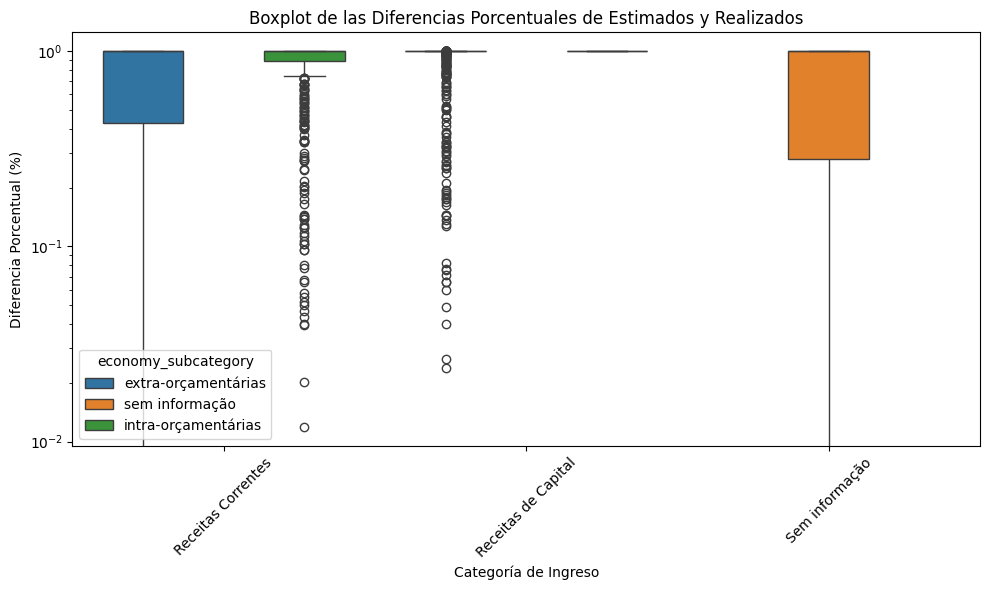

In [203]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="economy_category", y="difference_est_realized", data=df, hue = "economy_subcategory")
plt.title("Boxplot de las Diferencias Porcentuales de Estimados y Realizados")
plt.xlabel("Categoría de Ingreso")
plt.ylabel("Diferencia Porcentual (%)")
plt.xticks(rotation=45)
# plt.ylim(top = 30, bottom = -30)
plt.yscale("log")
plt.tight_layout()


Aquí podemos observar que los datos con la menor dispersión son los de ingresos de capital, por lo que la diferencia entre estimado y realizado es menor comparada con el resto de categorías. Dentro de las corrientes, las inter gubernamentales son las que tienen menor dispersión. En todos los datos encontramos muchos valores atípicos, los cuales podrían ser analizados por secciones por si pudieran arrojar algo más de luz de cara a futuro.

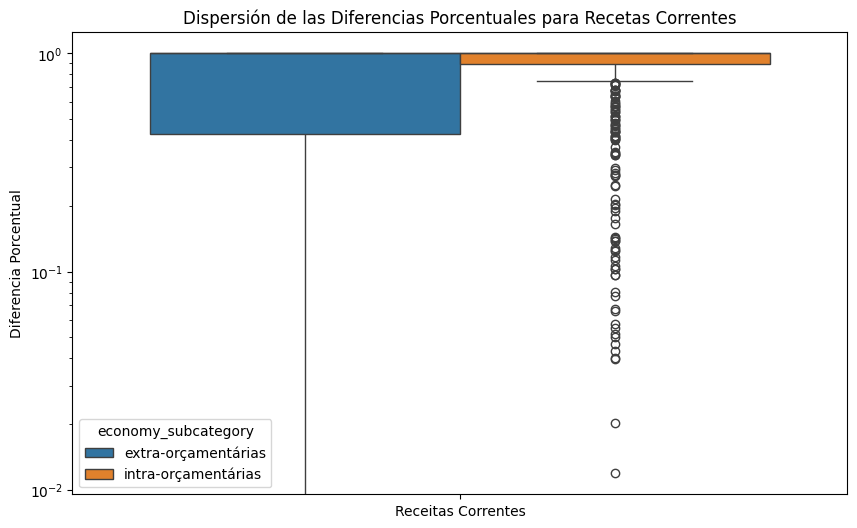

In [205]:
df_recetas_correntes = df[df['economy_category'] == 'Receitas Correntes']

plt.figure(figsize=(10,6))
sns.boxplot(x='economy_category', y='difference_est_realized', data=df_recetas_correntes, hue = "economy_subcategory")

plt.title("Dispersión de las Diferencias Porcentuales para Recetas Correntes")
plt.ylabel("Diferencia Porcentual")
plt.xlabel("")
plt.yscale("log")
plt.show()


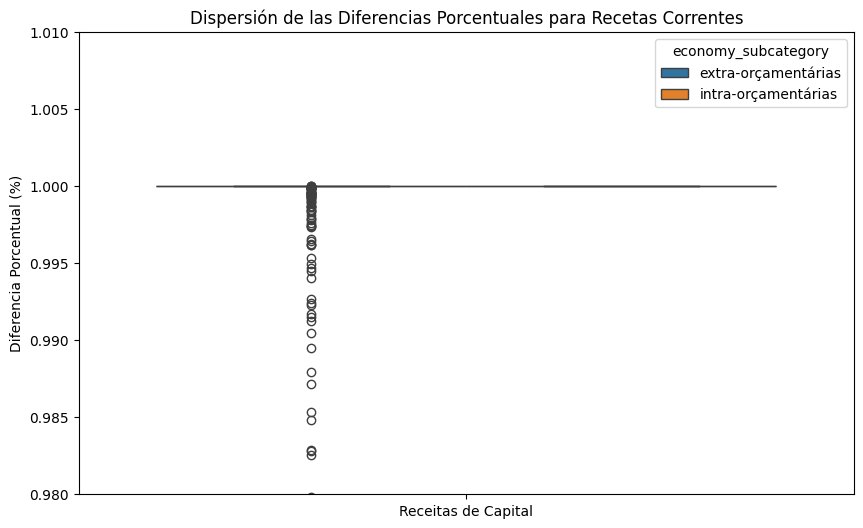

In [219]:
df_recetas_capital = df[df['economy_category'] == 'Receitas de Capital']

plt.figure(figsize=(10,6))
sns.boxplot(x='economy_category', y='difference_est_realized', data=df_recetas_capital, hue = "economy_subcategory")

plt.title("Dispersión de las Diferencias Porcentuales para Recetas Correntes")
plt.ylabel("Diferencia Porcentual (%)")
plt.xlabel("")
plt.ylim(0.98,1.01)
plt.show()


Para los ingresos de capital vemos que incluso a escalas pequeñas no podemos discernir nada. Esto indica que los datos apenas están dispersos, y añadiendo los tantos valores atípicos existentes por debajo nos indica que hay muchísimos valores que se acercan más al 0. Sería conveniente una mejor limpieza de ceros o valores atípicos para continuar con un mejor análisis.